# **Análisis Estadístico de Redes Sociales: Taller 1**

## Valentina Cardona Saldaña

Desarrollo de los ejercicios propuestos en el [Taller 1](https://www.dropbox.com/scl/fi/ih25w1spp3pivjkelvfcj/Taller_1.pdf?rlkey=wda6wrt94gdfg4mahs13sv3sd&dl=0) de la asignatura [Análisis Estadístico de Redes Sociales](https://sites.google.com/view/juansosa/social-networks), impartida por el profesor [Juan Sosa](https://github.com/jstats1702) como parte del programa de la Maestría en Ciencias - Estadística de la Universidad Nacional de Colombia.

In [1]:
# Paquetes
import pandas as pd
import numpy as np
import rdata

#import igraph as ig
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Ejercicio 1
Reproducir los ejemplos 3.1, 3.2, 3.3, 4.2, 4.4 de [Gestión de datos relacionales](https://rpubs.com/jstats1702/931287) en Python usando igraph y/o NetworkX

#### 3.1 Ejemplo: Red binaria no dirigida

In [2]:
# red binaria no dirigida
G1 = nx.Graph()
G1.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

In [3]:
# Clase de objeto
print(type(G1))

<class 'networkx.classes.graph.Graph'>


In [4]:
# Identificador
id(G1)

4993670064

In [5]:
# Vértices / Nodos
list(G1.nodes)

[1, 2, 3, 4, 5, 6, 7]

In [6]:
# Orden
## Número de nodos
print(G1.number_of_nodes())

## Otra forma
print(G1.order())

7
7


In [7]:
# Aristas
list(G1.edges)

[(1, 2),
 (1, 3),
 (2, 3),
 (2, 4),
 (3, 5),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (6, 7)]

In [8]:
# Tamaño
## Número de aristas
print(G1.number_of_edges())

## Otra forma
print(G1.size())

10
10


In [9]:
# Ponderada?
nx.is_weighted(G1)

False

In [10]:
# Simple?
not G1.is_multigraph()

True

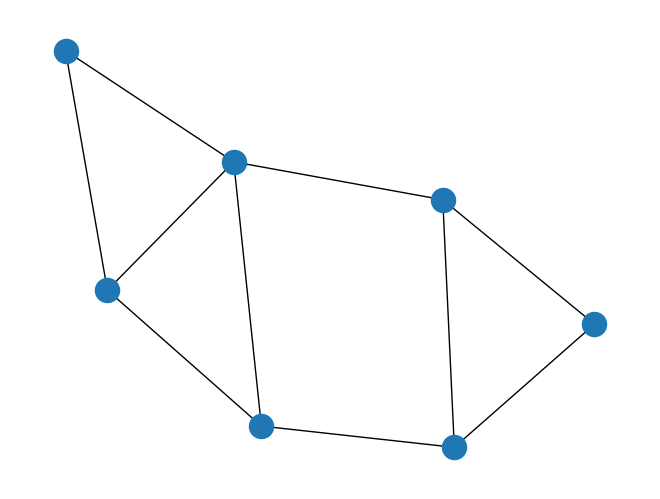

In [11]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

## Sin etiquetas (Por defecto)
plt.figure()
#plt.title("Red binaria no dirigida")
nx.draw(G1)
plt.show()

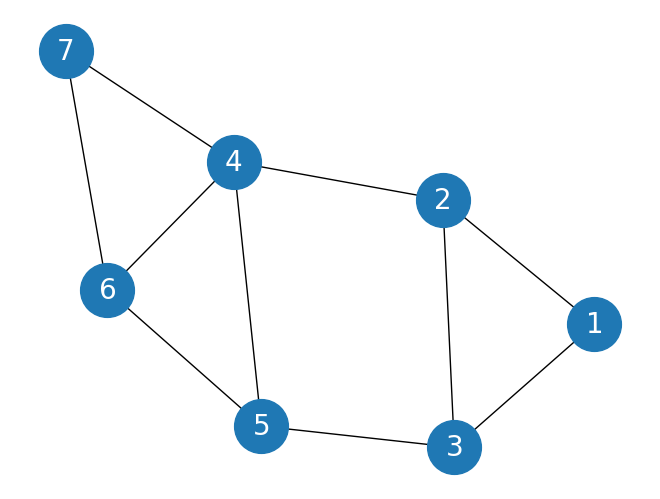

In [12]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

## Con etiquetas
plt.figure()
#plt.title("Red binaria no dirigida")
nx.draw(G1, with_labels = True, font_color = 'white', node_size = 1500, font_size = 20)
plt.show()

#### 3.2 Ejemplo: Red ponderada no dirigida

In [13]:
# red ponderada no dirigida
G2 = G1.copy()

## Establecer la semilla
np.random.seed(21022024)
## Establecer los pesos
weights = list(np.round(np.random.rand(G1.size()), 3))

## Iterar sobre las aristas del grafo y asignar los pesos
for i, edge in enumerate(G1.edges()):
    G2[edge[0]][edge[1]]['weight'] = weights[i]
    
## Verificación
print(G2.edges(data = 'weight'))

[(1, 2, 0.886), (1, 3, 0.514), (2, 3, 0.902), (2, 4, 0.434), (3, 5, 0.36), (4, 5, 0.579), (4, 6, 0.83), (4, 7, 0.932), (5, 6, 0.795), (6, 7, 0.282)]


In [14]:
# Ponderada?
nx.is_weighted(G2)

True

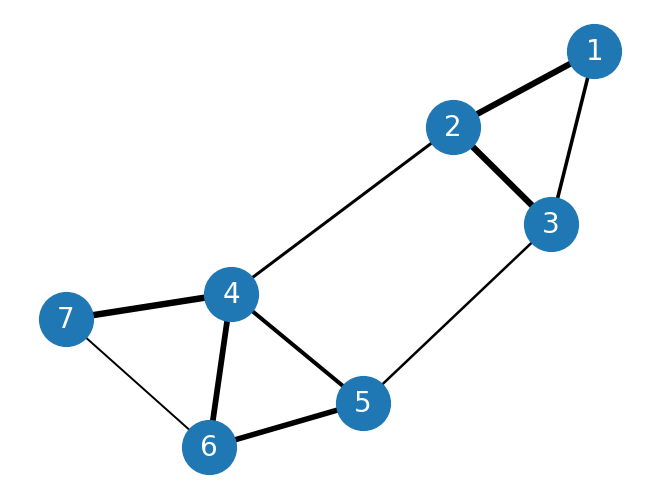

In [15]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Red ponderada no dirigida")
widths = nx.get_edge_attributes(G2, 'weight')
## Multiplica cada valor por 5
widths_scaled = [5 * width for width in widths.values()]
nx.draw(G2, with_labels = True, width = widths_scaled, font_color='white',
        node_size = 1500, font_size = 20)
plt.show()

#### 3.3 Ejemplo: Red binaria dirigida

In [16]:
# red binaria dirigida
D1 = nx.DiGraph()
D1.add_edges_from([(1,2), (1,3), (2,3), (3,2)])

In [17]:
# Aristas
list(D1.edges())

[(1, 2), (1, 3), (2, 3), (3, 2)]

In [18]:
# Etiquetas
## Establecer el nombre de los nodos
names = {1: "Juan", 2: "Maria", 3: "Pedro"}
D1 = nx.relabel_nodes(D1, names)

# Atributo 'sexo' como atributo
sexo = {"Juan": "M", "Maria": "F", "Pedro": "M"}
nx.set_node_attributes(D1, sexo, "sexo")

# Aristas
print(D1.nodes(data = True))

[('Juan', {'sexo': 'M'}), ('Maria', {'sexo': 'F'}), ('Pedro', {'sexo': 'M'})]


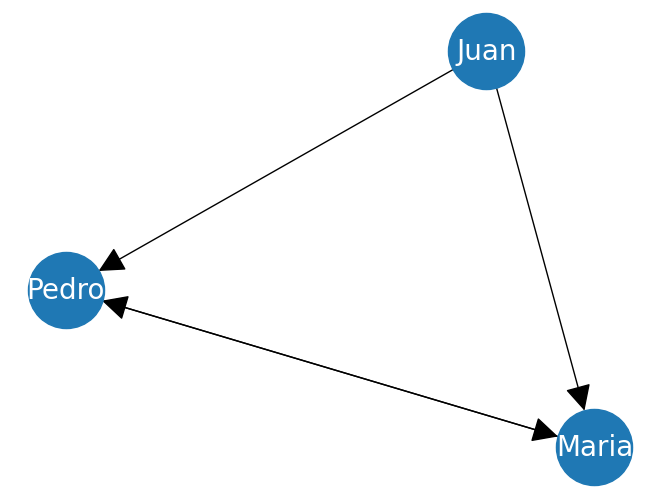

In [19]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Red binaria dirigida")
nx.draw(D1, with_labels = True, node_size = 3000, font_color='white', font_size = 20, arrowsize = 40)
plt.show()

#### 4.2 Ejemplo: Red binaria no dirigida

In [20]:
# red binaria no dirigida
G1 = nx.Graph()
G1.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,5), (4,5), (4,6), (4,7), (5,6), (6,7)])

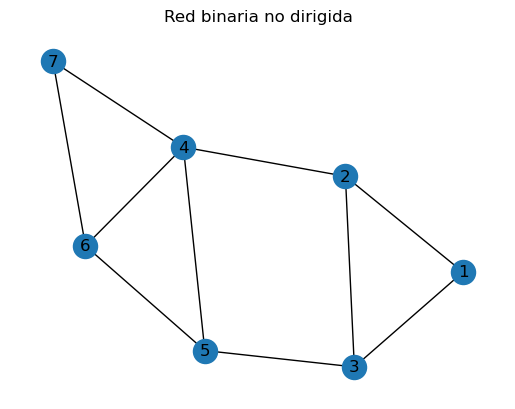

In [21]:
# Visualización

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
plt.title("Red binaria no dirigida")
nx.draw(G1, with_labels = True)
plt.show()

In [22]:
# Matriz de adyacencia
A = nx.adjacency_matrix(G1)

# Clase de objeto
type(A)

scipy.sparse._csr.csr_array

In [23]:
print(A)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 4)	1
  (3, 5)	1
  (3, 6)	1
  (4, 2)	1
  (4, 3)	1
  (4, 5)	1
  (5, 3)	1
  (5, 4)	1
  (5, 6)	1
  (6, 3)	1
  (6, 5)	1


In [24]:
# Convertir la matriz dispersa a una matriz densa
Y = A.todense()
## Otra forma
#Y = nx.to_numpy_array(G1)

# Clase de objeto
type(Y)

numpy.ndarray

In [25]:
# Simétrica?
np.array_equal(Y, Y.T)

True

In [26]:
print(Y)

[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


In [27]:
# Versión vectorizada exhaustiva
r = np.arange(len(Y))

mask = r[:,None]<r

## Triangular inferior
yvec1 = Y.T[mask]

print(yvec1)

[1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1]


In [28]:
# Versión vectorizada indexada
yvec2 = np.where(yvec1 == 1)

print(yvec2[0])

[ 0  1  6  7 12 15 16 17 18 20]


#### 4.4 Ejemplo: Red binaria no dirigida (cont.)

In [29]:
# Matriz de aristas
n = Y.shape[0]
A = []
for i in range(n-1):
    for j in range(i+1, n):
        if Y[i, j] == 1:
            A.append([i+1, j+1])  # Suma 1 a i y j para que los índices comiencen desde 1

A = np.array(A)

In [30]:
# Clase de objeto
type(A)

numpy.ndarray

In [31]:
print(A)

[[1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 5]
 [4 5]
 [4 6]
 [4 7]
 [5 6]
 [6 7]]


### Ejercicio 2
Considere el grafo $G = (V,E)$, con

$V = \{1, 2, 3, 4, 5\}$ y $E = \{\{1, 2\}; \{1, 3\}; \{2, 3\}; \{2, 4\}; \{2, 5\}; \{3, 5\}; \{4, 5\}\}$.

(a) Visualizar G.

(b) Calcular el orden, el tamaño, y el diámetro del grafo.

(c) Calcular el grado de cada vértice.

(d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

In [32]:
# Definir grafo
G3 = nx.Graph()
G3.add_nodes_from([1, 2, 3, 4, 5])
G3.add_edges_from([(1,2), (1,3), (2,3), (2,4), (2,5), (3,5), (4,5)])

print(G3.nodes())
print(G3.edges())

[1, 2, 3, 4, 5]
[(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (4, 5)]


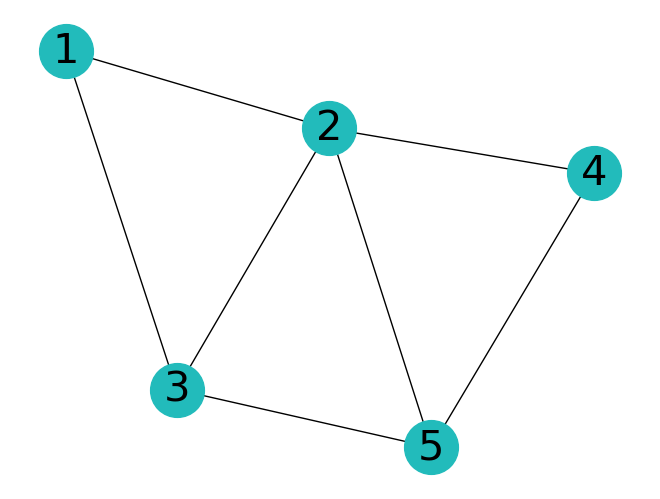

In [33]:
# (a) Visualizar G

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Red binaria no dirigida")
nx.draw(G3, with_labels = True, node_color = '#22bbbb', node_size = 1500, font_size = 30)
plt.show()

In [34]:
# (b) Calcular el orden, el tamaño, y el diámetro del grafo.

print("Orden del grafo: ", G3.order())
print("Tamaño del grafo: ", G3.size())
print("Diámetro del grafo: ", nx.diameter(G3))

Orden del grafo:  5
Tamaño del grafo:  7
Diámetro del grafo:  2


In [35]:
# (c) Calcular el grado de cada vértice.

#print(G3.degree())

for nodo, grado in G3.degree():
    print("El grado del nodo", nodo, "es:", grado)

El grado del nodo 1 es: 2
El grado del nodo 2 es: 4
El grado del nodo 3 es: 3
El grado del nodo 4 es: 2
El grado del nodo 5 es: 3


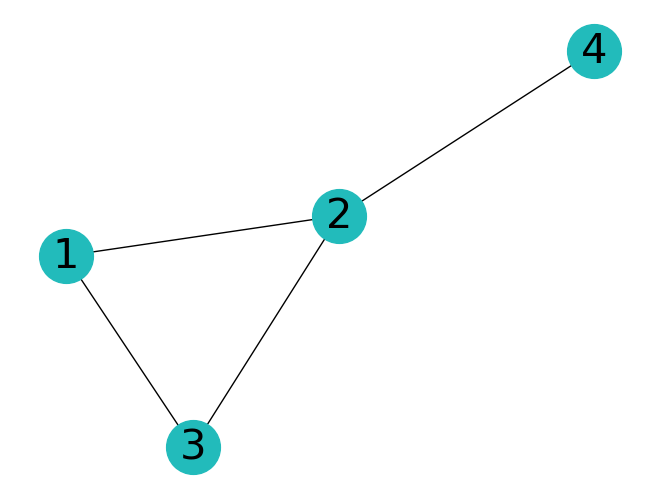

In [36]:
# (d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

## Eliminar nodo 5
G3.remove_node(5)

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Subgrafo con nodos 1, 2, 3 y 4")
nx.draw(G3, with_labels = True, node_color = '#22bbbb', node_size = 1500, font_size = 30)
plt.show()

### Ejercicio 3
Considere el digrafo $G = (V,E)$, con

$V = \{1, 2, 3, 4, 5\}$ y $E = \{(1, 3); (2, 3); (2, 4); (2, 5); (3, 1); (3, 5); (4, 5); (5, 4)\}$.

(a) Visualizar G.

(b) Calcular el orden, el tamaño, y el diámetro del grafo.

(c) Calcular el grado de cada vértice del grafo.

(d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

In [37]:
# Crear digrafo
D2 = nx.DiGraph()
D2.add_nodes_from([1, 2, 3, 4, 5])
D2.add_edges_from([(1,3), (2,3), (2,4), (2,5), (3,1), (3,5), (4,5), (5,4)])

print(D2.nodes())
print(D2.edges())

[1, 2, 3, 4, 5]
[(1, 3), (2, 3), (2, 4), (2, 5), (3, 1), (3, 5), (4, 5), (5, 4)]


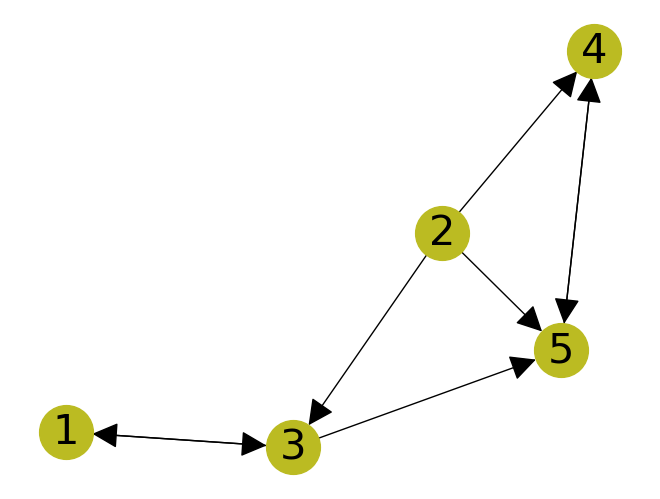

In [38]:
# (a) Visualizar G.

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Red binaria dirigida")
nx.draw(D2, with_labels = True, node_color = '#bbbb22', node_size = 1500, font_size = 30, arrowsize = 40)
plt.show()

In [39]:
# (b) Calcular el orden, el tamaño, y el diámetro del grafo.
print("Orden del digrafo: ", D2.order())
print("Tamaño del digrafo: ", D2.size())
print("Diámetro del digrafo: ", nx.diameter(D2.to_undirected()))

Orden del digrafo:  5
Tamaño del digrafo:  8
Diámetro del digrafo:  3


In [40]:
# (c) Calcular el grado de cada vértice del grafo.

## Calcular el grado de entrada y de salida de cada nodo
grado_entrada = dict(D2.in_degree())
grado_salida = dict(D2.out_degree())

## Imprimir los grados de cada nodo
for nodo in D2.nodes():
    grado_in = grado_entrada.get(nodo, 0)
    grado_out = grado_salida.get(nodo, 0)
    print("El nodo", nodo, "tiene grado de entrada:", grado_in, "y grado de salida:", grado_out)

El nodo 1 tiene grado de entrada: 1 y grado de salida: 1
El nodo 2 tiene grado de entrada: 0 y grado de salida: 3
El nodo 3 tiene grado de entrada: 2 y grado de salida: 2
El nodo 4 tiene grado de entrada: 2 y grado de salida: 1
El nodo 5 tiene grado de entrada: 3 y grado de salida: 1


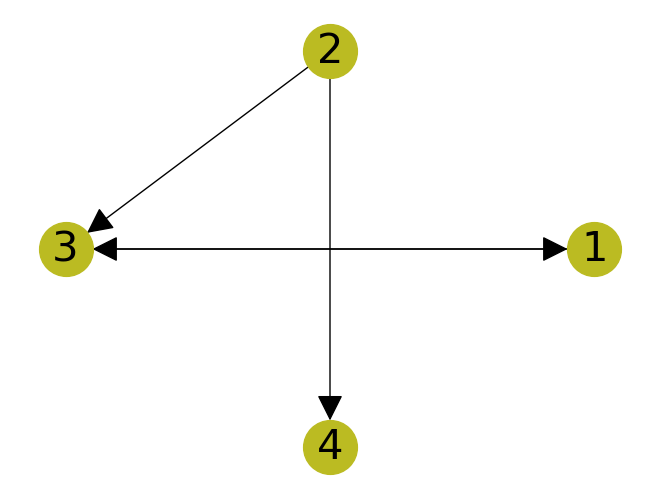

In [41]:
# (d) Graficar el subgrafo generado por los nodos 1, 2, 3, y 4.

## Eliminar nodo 5
D2.remove_node(5)

## Establecer la semilla
np.random.seed(21022024)

plt.figure()
#plt.title("Subgrafo con nodos 1, 2, 3 y 4")
nx.draw_circular(D2, with_labels = True, node_color = '#bbbb22', node_size = 1500, font_size = 30,
                 arrowsize = 40)
plt.show()

### Ejercicio 4
Una triada es un subgrafo generado a partir de una tripla de vértices.

(a) Graficar todos los posibles estados triádicos no dirigidos.

(b) Identificar los estados isomorfos.

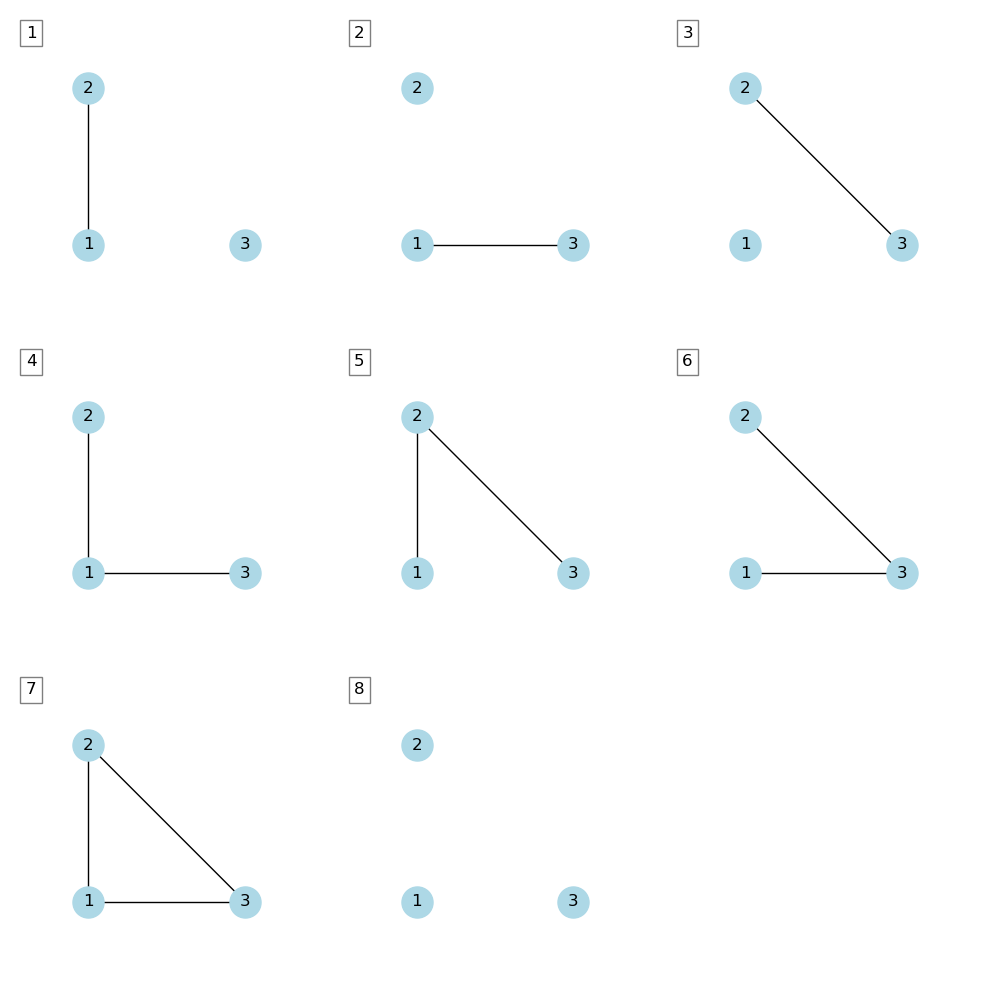

In [42]:
# (a) Graficar todos los posibles estados triádicos no dirigidos.

## Establecer la semilla
np.random.seed(21022024)

## Crear grafo con 3 nodos
G4 = nx.Graph()
G4.add_nodes_from([1, 2, 3])

## Definir la posición de los nodos
pos = {1: (0, 0), 2: (0, 1), 3: (1, 0)}

## Crear la figura y los ejes
fig, axes = plt.subplots(3, 3)
fig.set_size_inches(10, 10)

## Definir una función para dibujar la red en cada subfigura
def draw_graph(graph, ax, pos, **kwargs):
    ## Dibujar los nodos y las aristas
    nx.draw(graph, ax=ax, pos=pos, with_labels=True, node_color='lightblue', node_size=500, **kwargs)
    ## Limitar los ejes para que se ajusten al rectángulo
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)

## Dibujar cada configuración en una subfigura diferente
configurations = [
    [(1, 2)], 
    [(1, 3)], 
    [(2, 3)], 
    [(1, 2), (1, 3)], 
    [(2, 1), (2, 3)], 
    [(3, 1), (3, 2)], 
    [(1, 2), (1, 3), (2, 3)], 
    []
]

for i, config in enumerate(configurations):
    ## Agregar las aristas correspondientes
    G4.add_edges_from(config)
    ## Dibujar la red en la subfigura correspondiente, excepto para la última
    if i < 8:
        draw_graph(G4, ax=axes[i//3, i%3], pos=pos)
        ## Agregar el número de la subfigura en la esquina superior izquierda
        axes[i//3, i%3].text(0.05, 0.95, str(i+1), transform=axes[i//3, i%3].transAxes, fontsize=12,
                            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ## Remover las aristas para la próxima configuración
    G4.remove_edges_from(config)

## Eliminar los ejes para la última subfigura
axes[2, 2].axis('off')

## Mostrar el gráfico
plt.tight_layout()
plt.show()

In [43]:
# (b) Identificar los estados isomorfos.

## Inicializar una lista para almacenar los gráficos
graphs = []

## Generar los gráficos y agregarlos a la lista
for config in configurations:
    G = nx.Graph()
    G.add_edges_from(config)
    graphs.append(G)

## Determinar qué gráficos son isomorfos
for i in range(len(graphs)):
    for j in range(len(graphs)):
        if j > i and nx.is_isomorphic(graphs[i], graphs[j]):
            print(f"Los gráficos {i+1} y {j+1} son isomorfos.")

Los gráficos 1 y 2 son isomorfos.
Los gráficos 1 y 3 son isomorfos.
Los gráficos 2 y 3 son isomorfos.
Los gráficos 4 y 5 son isomorfos.
Los gráficos 4 y 6 son isomorfos.
Los gráficos 5 y 6 son isomorfos.


### Ejercicio 5

Visualizar todos los grafos (no dirigidos) conectados con 4 vértices.

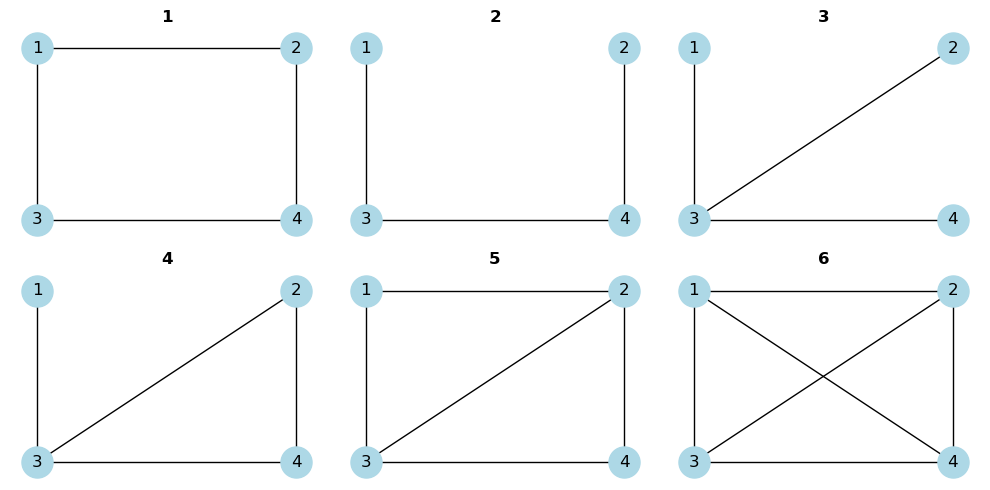

In [44]:
## Establecer la semilla
np.random.seed(21022024)

fig, axes = plt.subplots(2, 3, figsize = (10, 5))

## Función
def draw_square_configuration(plots, ax):
    G = nx.Graph()
    G.add_nodes_from([1, 2, 3, 4])
    G.add_edges_from(plots)
    
    ## Coordenadas de los nodos
    pos = {1: (0, 1), 2: (1, 1),
           3: (0, 0), 4: (1, 0)}
    
    ## Dibujar el grafo
    nx.draw(G, pos = pos, ax = ax, with_labels = True,
            node_color = 'lightblue', node_size = 500, font_size = 12)

## Configuraciones
conf = {
    "1": [(1, 2), (2, 4), (4, 3), (3, 1)],
    "2": [(1, 3), (3, 4), (4, 2)],
    "3": [(1, 3), (3, 4), (3, 2)],
    "4": [(1, 3), (3, 4), (4, 2), (3, 2)],
    "5": [(1, 3), (3, 4), (4, 2), (2, 1), (3, 2)],
    "6": [(1, 3), (3, 4), (4, 2), (2, 1), (3, 2), (1, 4)],
}

## Ciclo por cada grafo
for (title, plots), ax in zip(conf.items(), axes.flatten()):
    draw_square_configuration(plots, ax)
    ax.set_title(title, fontsize = 12, fontweight = "extra bold")

fig.tight_layout()
plt.show()

### Ejercicio 6
Escribir una rutina que reconstruya la matriz de adyacencia a partir de la matriz
de aristas y una lista de vértices.

(a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

(b) Probar la rutina con la red simulada.

(c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

In [45]:
# Función
def matriz_adyacencia(matriz_aristas, lista_vertices):
    ## Inicializar una matriz de adyacencia llena de ceros
    n = len(lista_vertices)
    matriz_adj = np.zeros((n, n), dtype = int)
    
    ## Recorrer la matriz de aristas
    for arista in matriz_aristas:
        ## Obtener los índices de los vértices
        vertice_1 = arista[0] - 1  ## Restar 1 para ajustar al índice de Python (comienza en 0)
        vertice_2 = arista[1] - 1
        
        ## Marcar la conexión en ambas direcciones
        matriz_adj[vertice_1, vertice_2] = 1
        matriz_adj[vertice_2, vertice_1] = 1
    
    return matriz_adj

In [46]:
# (a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

## Establecer la semilla
np.random.seed(21022024)

## Número de nodos
n = 25

## Lista de vértices
G6_Vertices = list(range(1, n + 1))

## Matriz de matriz de aristas
G6_Aristas = []

## Iterar sobre todas las parejas de nodos y agregar un enlace con la probabilidad dada
for i in G6_Vertices:
    for j in range(i+1, n+1):
        if np.random.binomial(1, 0.1) == 1:
            G6_Aristas.append([i, j])
            
print(G6_Aristas)

[[1, 4], [1, 9], [1, 12], [1, 18], [1, 20], [2, 6], [4, 13], [5, 11], [5, 12], [6, 11], [6, 18], [7, 10], [7, 17], [8, 22], [9, 15], [10, 11], [10, 13], [11, 19], [12, 21], [13, 16], [13, 20], [13, 21], [14, 22], [15, 17], [15, 18], [15, 20], [16, 21], [16, 23], [18, 23], [21, 23]]


In [47]:
# (b) Probar la rutina con la red simulada.
A = matriz_adyacencia(G6_Aristas, G6_Vertices)

# Clase de objeto
print(type(A))
# Simétrica?
print(np.array_equal(A, A.T))
# Visualizar A
print(A)

<class 'numpy.ndarray'>
True
[[0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0

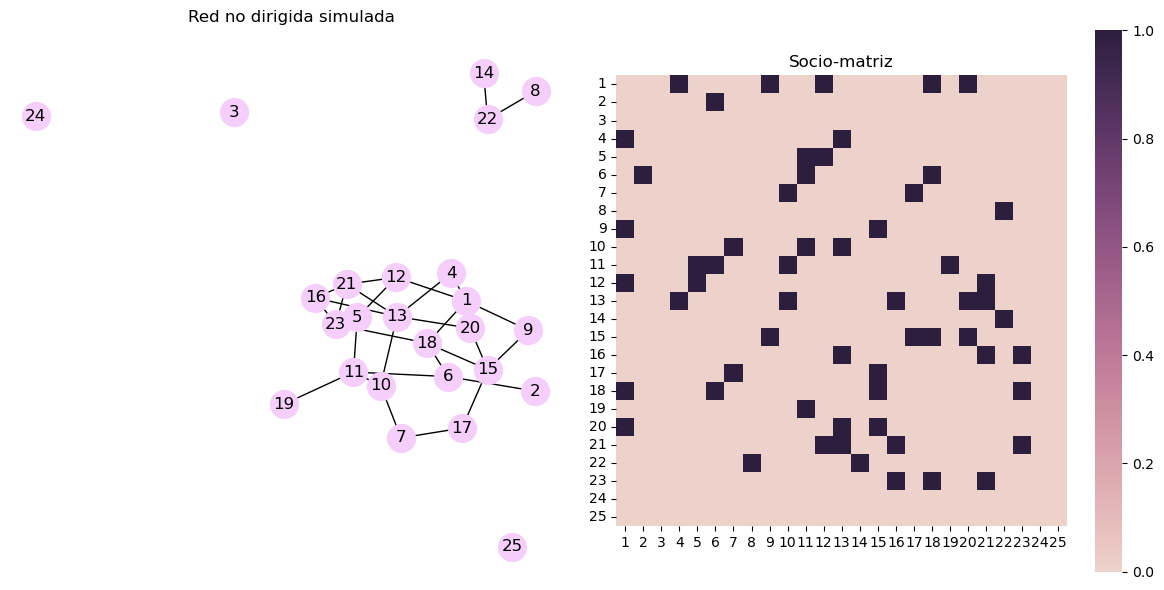

In [48]:
# (c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

## Crear grafo de la matriz de adyacencia
G6 = nx.from_numpy_array(A)
## Establecer el nombre de los nodos
mapping = {i: v for i, v in enumerate(G6_Vertices)}
G6 = nx.relabel_nodes(G6, mapping)

## Establecer la semilla
np.random.seed(21022024)

## Ignorar advertencias
warnings.filterwarnings("ignore")

## Crear una figura y ejes para los subplots
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

## Primer subplot: Grafo
plt.sca(axs[0])
plt.title("Red no dirigida simulada")
pos = nx.spring_layout(G6, k = 0.15, iterations = 20)
nx.draw(G6, pos = pos, with_labels = True, node_color = '#F6CEFC', node_size = 400)

## Segundo subplot: Heatmap
plt.sca(axs[1])
sns.heatmap(A, annot = False, cmap = sns.cubehelix_palette(as_cmap = True), vmin = 0, vmax = 1, square = True)
plt.xticks(ticks=np.arange(0.5, len(G6_Vertices)), labels=G6_Vertices)
plt.yticks(ticks=np.arange(0.5, len(G6_Vertices)), labels=G6_Vertices)
plt.title('Socio-matriz')

## Ajustar diseño
plt.tight_layout()

## Mostrar los subplots
plt.show()


### Ejercicio 7
Escribir una rutina que reconstruya la matriz de aristas y la lista de vértices a partir de la matriz de adyacencia.

(a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

(b) Probar la rutina con la red simulada.

(c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

In [49]:
# Función
def aristas_y_vertices(matriz_adj):
    ## Obtener el tamaño de la matriz de adyacencia
    n = len(matriz_adj)
    
    ## Lista para almacenar las aristas y la lista de los vértices
    aristas = []
    lista_vertices = list(range(1, n+1))
    
    ## Recorrer la matriz de adyacencia para encontrar las aristas
    for i in range(n):
        for j in range(i+1, n):  ## Solo mitad superior de la matriz debido a la simetría
            if matriz_adj[i, j] == 1:
                aristas.append([i+1, j+1])  ## Añadir 1 para ajustar al índice de los vértices
    
    return aristas, lista_vertices

In [50]:
#(a) Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1.

## Establecer la semilla
np.random.seed(22022024)

## Número de nodos
n = 25

## Matriz de adyacencia llena de 0s
G7_MatrizAdj = np.zeros((n, n), dtype = int)

## Iterar sobre matriz y agregar un enlace con la probabilidad dada
for i in range(n):
    for j in range(i+1, n):
        if np.random.binomial(1, 0.1) == 1:
            G7_MatrizAdj[i, j] = 1
            G7_MatrizAdj[j, i] = 1
            
print(G7_MatrizAdj)

[[0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 

In [51]:
# (b) Probar la rutina con la red simulada.
G7_Aristas, G7_Vertices = aristas_y_vertices(G7_MatrizAdj)

print(G7_Vertices)
print(G7_Aristas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[[1, 4], [1, 11], [1, 21], [1, 25], [2, 3], [2, 12], [2, 22], [3, 13], [3, 22], [3, 23], [4, 15], [4, 20], [4, 22], [6, 7], [6, 17], [7, 9], [7, 16], [7, 18], [7, 20], [7, 22], [8, 24], [11, 22], [12, 19], [12, 20], [13, 20], [16, 19], [18, 19], [18, 21], [22, 23]]


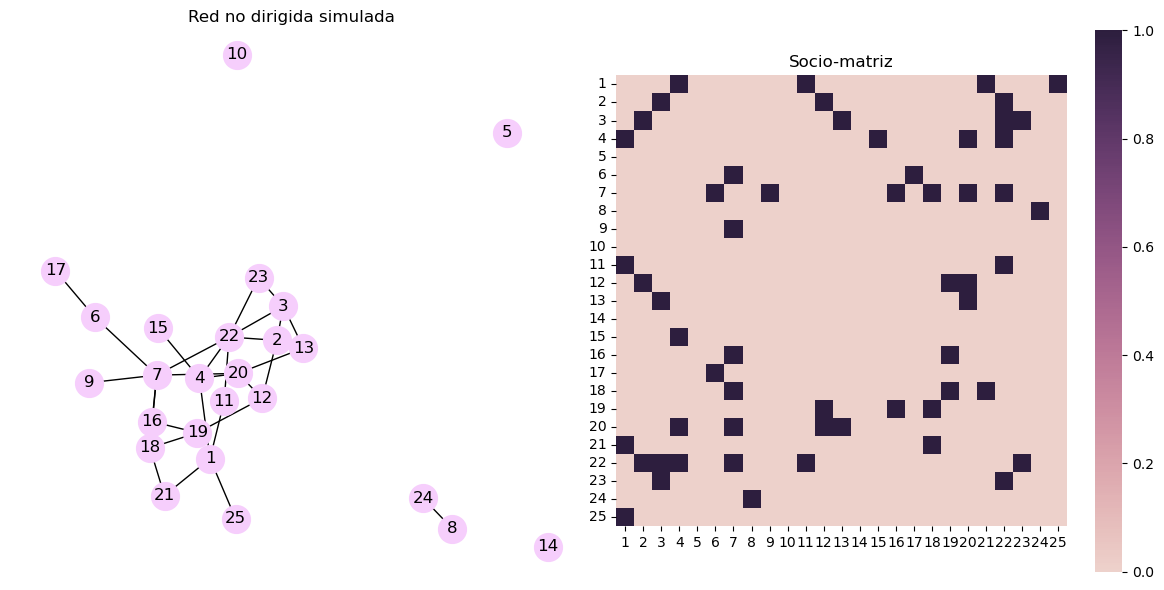

In [52]:
# (c) Visualizar la red simulada por medio de un grafo y una socio-matriz.

## Crear grafo a partir de la matriz de aristas y lista de vértices
G7 = nx.Graph()
G7.add_nodes_from(G7_Vertices)
G7.add_edges_from(G7_Aristas)

## Establecer la semilla
np.random.seed(22022024)

## Ignorar advertencias
warnings.filterwarnings("ignore")

## Crear una figura y ejes para los subplots
fig, axs = plt.subplots(1, 2, figsize = (12, 6))

## Primer subplot: Grafo
plt.sca(axs[0])
plt.title("Red no dirigida simulada")
pos = nx.spring_layout(G7, k = 0.15, iterations = 20)
nx.draw(G7, pos = pos, with_labels = True, node_color = '#F6CEFC', node_size = 400)

## Segundo subplot: Heatmap
plt.sca(axs[1])
sns.heatmap(G7_MatrizAdj, annot = False, cmap = sns.cubehelix_palette(as_cmap = True), vmin = 0, vmax = 1, square = True)
plt.xticks(ticks=np.arange(0.5, len(G7_Vertices)), labels=G7_Vertices)
plt.yticks(ticks=np.arange(0.5, len(G7_Vertices)), labels=G7_Vertices)
plt.title('Socio-matriz')

## Ajustar diseño
plt.tight_layout()

## Mostrar los subplots
plt.show()

### Ejercicio 8
Escribir una rutina que simule redes tanto dirigidas como no dirigidas a partir de enlaces aleatorios independientes e idénticamente distribuidos con una probabilidad de éxito dada. Esta rutina debe tener como argumentos el orden de la red, la probabilidad de interacción (por defecto 0.5), el tipo de red (por defecto como no dirigida) y la semilla (por defecto 123), y además, tener como retorno una versión vectorizada de la matriz de adyacencia y una visualización. Probar esta rutina generando cuatro casos diferentes

In [53]:
# Función
def red_simulada(orden, prob = 0.5, tipo = "No dirigida", semilla = 123):
    
    ## Establecer la semilla
    np.random.seed(semilla)
    
    ## Tipo de red
    if tipo == "No dirigida":
        ## Iterar sobre número de nodos (orden) y agregar un enlace con la probabilidad dada
        edges = [(i, j) for i in range(1, orden+1) for j in range(i+1, orden+1) if np.random.binomial(1, prob) == 1]
        ## Crear grafo
        g = nx.Graph()
        g.add_nodes_from(list(range(1, orden+1)))
        g.add_edges_from(edges)
        
    
    elif tipo == "Dirigida":
        edges = []
        for _ in range(2):  # Replicar el comportamiento del bucle while ejecutándolo dos veces
            edges.extend([(i, j) for i in range(1, orden+1) for j in range(i+1, orden+1) if np.random.binomial(1, prob) == 1])

        g = nx.DiGraph()
        g.add_nodes_from(list(range(1, orden+1)))
        g.add_edges_from(edges)

    else:
        return "Tipo de red no válida"
    
    ## Matriz de Adyacencia
    MatrizAdj = nx.adjacency_matrix(g).todense()
    ## Versión vectorizada
    r = np.arange(len(MatrizAdj)) 
    ## Triangulares
    Vec = f"Triangular inferior: {MatrizAdj.T[r[:, None] < r]}"
    if tipo == "Dirigida":
        Vec += f"\nTriangular superior: {MatrizAdj.T[r[:, None] > r]}"

    ## Ignorar advertencias
    warnings.filterwarnings("ignore")
    ## Visualización
    plt.figure(figsize = (8, 6))
    pos = nx.spring_layout(g)
    nx.draw(g, pos, with_labels = True, node_color = 'skyblue', node_size = 1000, font_size = 20)
    plt.title("Red Simulada Dirigida" if tipo == "Dirigida" else "Red Simulada No Dirigida")
     
    return Vec, plt

Triangular inferior: [0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 0 0]


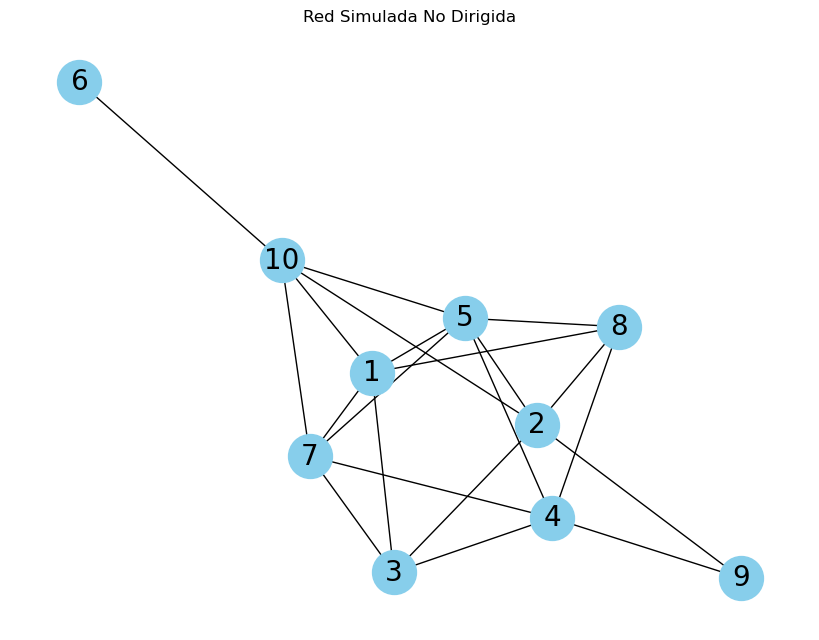

In [54]:
# Ejemplo de uso 1
## Red no dirida de orden 10 con probabilidad de éxito 0.5
resultado, _ = red_simulada(orden = 10, semilla = 202401)
print(resultado)

Triangular inferior: [1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1
 1 0 0 0 0]


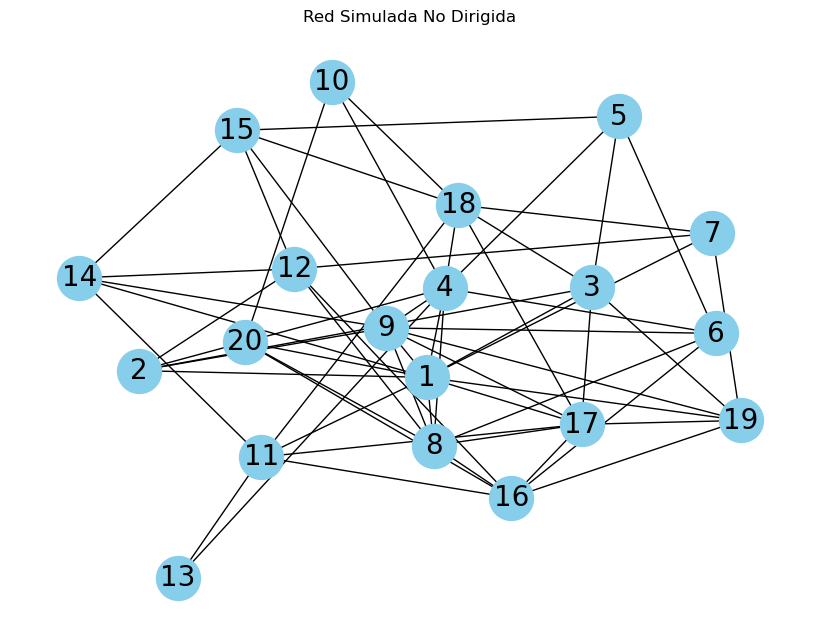

In [55]:
# Ejemplo de uso 2
## Red no dirida de orden 20 con probabilidad de éxito 0.3
resultado, _ = red_simulada(orden = 20, prob = 0.3, semilla = 202402)
print(resultado)

Triangular inferior: [0 0 0 0 0 0 0 0 0 0]
Triangular superior: [1 1 1 1 1 1 1 1 1 1]


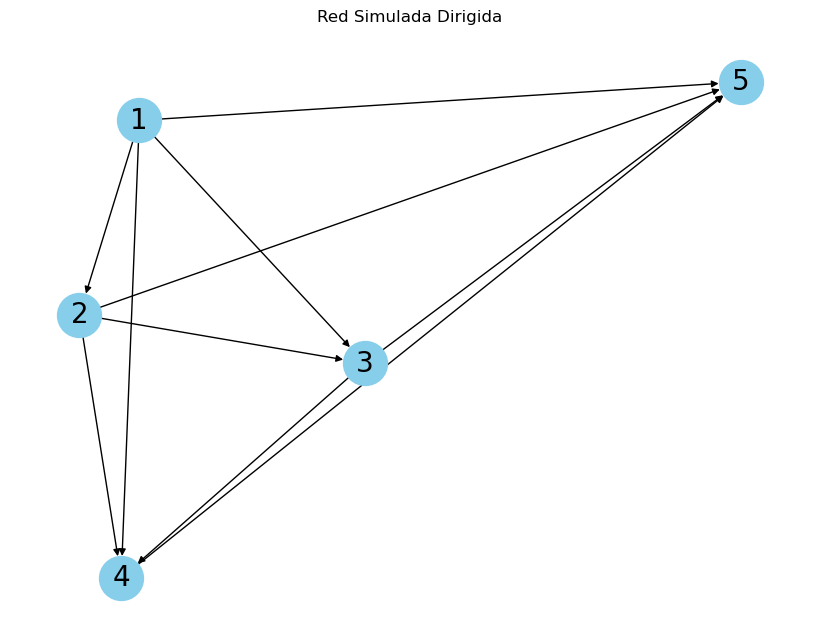

In [56]:
# Ejemplo de uso 3
## Red dirigida de orden 5 con probabilidad de éxito 0.8
resultado, _ = red_simulada(orden = 5, tipo = "Dirigida", prob = 0.8, semilla = 202403)
print(resultado)

Triangular inferior: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Triangular superior: [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1]


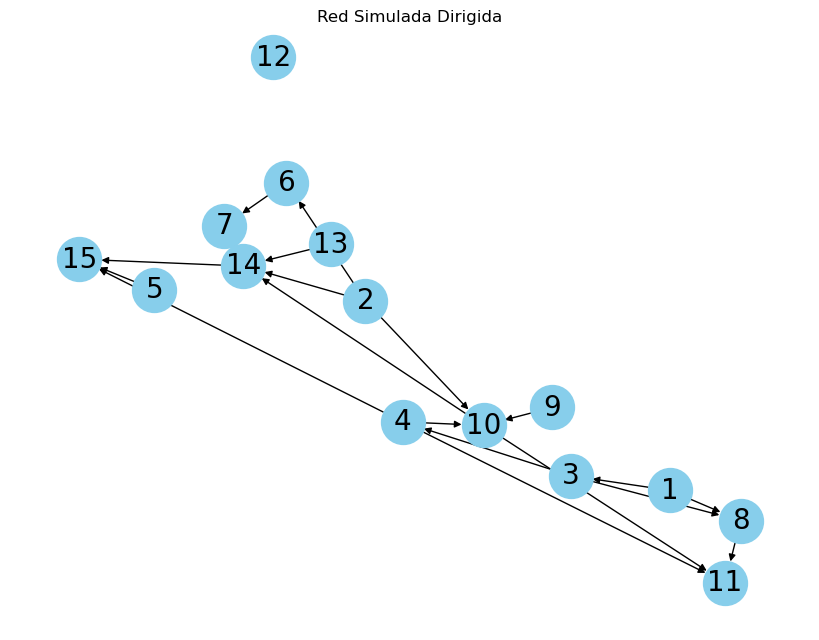

In [57]:
# Ejemplo de uso 4
## Red dirida de orden 15 con probabilidad de éxito 0.1
resultado, _ = red_simulada(orden = 15, tipo = "Dirigida", prob = 0.1, semilla = 202404)
print(resultado)

### Ejercicio 9
Considere el conjunto de datos dado en el archivo ```addhealth.RData``` disponible en la página web del curso. Estos datos fueron recopilados por *The National Longitudinal Study of Adolescent Health* y están asociados con un estudio escolar sobre salud y comportamientos sociales de adolescentes de varias escuelas en los Estados Unidos.
Los participantes nominaron hasta 5 niños y 5 niñas como amigos y reportaron el número de actividades extracurriculares en las que participaron juntos.

El archivo ```addhealth.RData``` contiene una lista con dos arreglos, ```X y E. X``` tiene tres campos: ```female``` (0 = No, 1 = Sí), ```race``` (1 = Blanco, 2 = Negro, 3 = Hispano, 4 = Otro) y ```grade``` (grado del estudiante). ```E``` también tiene tres campos: ```V1``` (vértice de salida) ```V2``` (vértice de llegada) y ```activities``` (número de actividades extracurriculares).

(a) Identificar y clasificar las variables nodales.

(b) Identificar y clasificar las variables relacionales.

(c) Calcular el orden, el tamaño, y el diámetro de la red.

(d) Visualizar la red sin tener en cuenta las variables nodales por medio de un grafo y una socio-matriz.

(e) Identificar el top 5 de los nodos más propensos a emitir/recibir relaciones.

#### Importación de datos

In [58]:
## Leer datos
addhealth = rdata.parser.parse_file("./Datos/addhealth.RData")
addhealth = rdata.conversion.convert(addhealth)

print(addhealth["dat"].keys())

dict_keys(['X', 'E'])


In [59]:
# Arreglo X
addhealth_X = addhealth["dat"]["X"]

## Crear un DataFrame de pandas
addhealth_X_df = pd.DataFrame(addhealth_X.values, ## Extraer los valores del DataArray
                              columns = addhealth_X.coords['dim_1'].values) ## Obtener los nombres de las columnas del atributo dim_1

## Ajustar los índices para que comiencen en 1
addhealth_X_df.index = addhealth_X_df.index + 1

## Convertir las columnas a números enteros
addhealth_X_df = addhealth_X_df.astype(int)
## Reemplazar los valores en el campo 'female'
addhealth_X_df['female'] = addhealth_X_df['female'].replace({0: 'No', 1: 'Sí'})
## Reemplazar los valores en el campo 'race'
addhealth_X_df['race'] = addhealth_X_df['race'].replace({1: 'Blanco', 2: 'Negro', 3: 'Hispano', 4: 'Otro'})

## Mostrar el DataFrame
print(addhealth_X_df.info())
addhealth_X_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 1 to 255
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   female  255 non-null    object
 1   race    255 non-null    object
 2   grade   255 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.1+ KB
None


,female,race,grade
1,Sí,Blanco,9
2,No,Blanco,9
3,Sí,Negro,11
4,Sí,Blanco,9
5,Sí,Negro,7


In [60]:
# Arreglo E
addhealth_E = addhealth["dat"]["E"]

## Crear un DataFrame de pandas
addhealth_E_df = pd.DataFrame(addhealth_E.values, ## Valores
                              columns = addhealth_E.coords['dim_1'].values) ## Nombres columnas

## Ajustar los índices para que comiencen en 1
addhealth_E_df.index = addhealth_E_df.index + 1

## Convertir las columnas a números enteros
addhealth_E_df = addhealth_E_df.astype(int)

## Mostrar el DataFrame
print(addhealth_E_df.info())
addhealth_E_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 1 to 1264
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   V1          1264 non-null   int64
 1   V2          1264 non-null   int64
 2   activities  1264 non-null   int64
dtypes: int64(3)
memory usage: 29.8 KB
None


,V1,V2,activities
1,1,2,2
2,1,24,2
3,1,42,3
4,1,64,4
5,1,104,2


In [61]:
# Crear dígrafo
D3 = nx.from_pandas_edgelist(addhealth_E_df, source = "V1", target = "V2", edge_attr = "activities",
                             create_using = nx.DiGraph())

## Convertir cada columna a un diccionario y añadirlos como atributos de los nodos
for column_name in addhealth_X_df.columns:
    attribute_dict = addhealth_X_df[column_name].to_dict()
    nx.set_node_attributes(D3, attribute_dict, name = column_name)
    
## Características de la red
print("¿Es dirigido?", nx.is_directed(D3))
print("¿Es ponderado?", nx.is_weighted(D3))

¿Es dirigido? True
¿Es ponderado? False


#### Desarrollo de ejercicio

In [62]:
# (a) Identificar y clasificar las variables nodales

## Son los atributos de los vértices y pueden ser de tipo discreto o continuo.

## Se encuentran en:
print("Variables nodales (todas discretas): ")
print(list(addhealth_X_df.columns))

print()
print()

## Características
print("Valores de female")
print(addhealth_X_df['female'].value_counts())
print()
print("Valores de race")
print(addhealth_X_df['race'].value_counts())
print()
print("Resumen de grade")
addhealth_X_df.grade.describe()

Variables nodales (todas discretas): 
['female', 'race', 'grade']


Valores de female
female
Sí    129
No    126
Name: count, dtype: int64

Valores de race
race
Blanco     132
Negro       96
Hispano     14
Otro        13
Name: count, dtype: int64

Resumen de grade


count    255.000000
mean       9.411765
std        1.626267
min        6.000000
25%        8.000000
50%        9.000000
75%       11.000000
max       12.000000
Name: grade, dtype: float64

In [63]:
# (b) Identificar y clasificar las variables relacionales.

## Son los atributos de aristas y, de manera similar, pueden ser de tipo discreto o continuo.

## En el addhealth_X_df sólo hay una variable relacional (número de actividades extracurriculares) que puede describir la fuerza de la relación entre pares de vértices

print("Tipo de variable relacional: ")
print(addhealth_E_df['activities'].dtype) # Continua

print("Característica de la variable 'activities':")
print(addhealth_E_df.activities.describe())

Tipo de variable relacional: 
int64
Característica de la variable 'activities':
count    1264.000000
mean        2.602848
std         1.586420
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         6.000000
Name: activities, dtype: float64


In [64]:
# (c) Calcular el orden, el tamaño, y el diámetro de la red.
print("Orden del digrafo: ", D3.order())
print("Tamaño del digrafo: ", D3.size())
print("Diámetro del digrafo: ", nx.diameter(D3.to_undirected()))

Orden del digrafo:  248
Tamaño del digrafo:  1264
Diámetro del digrafo:  7


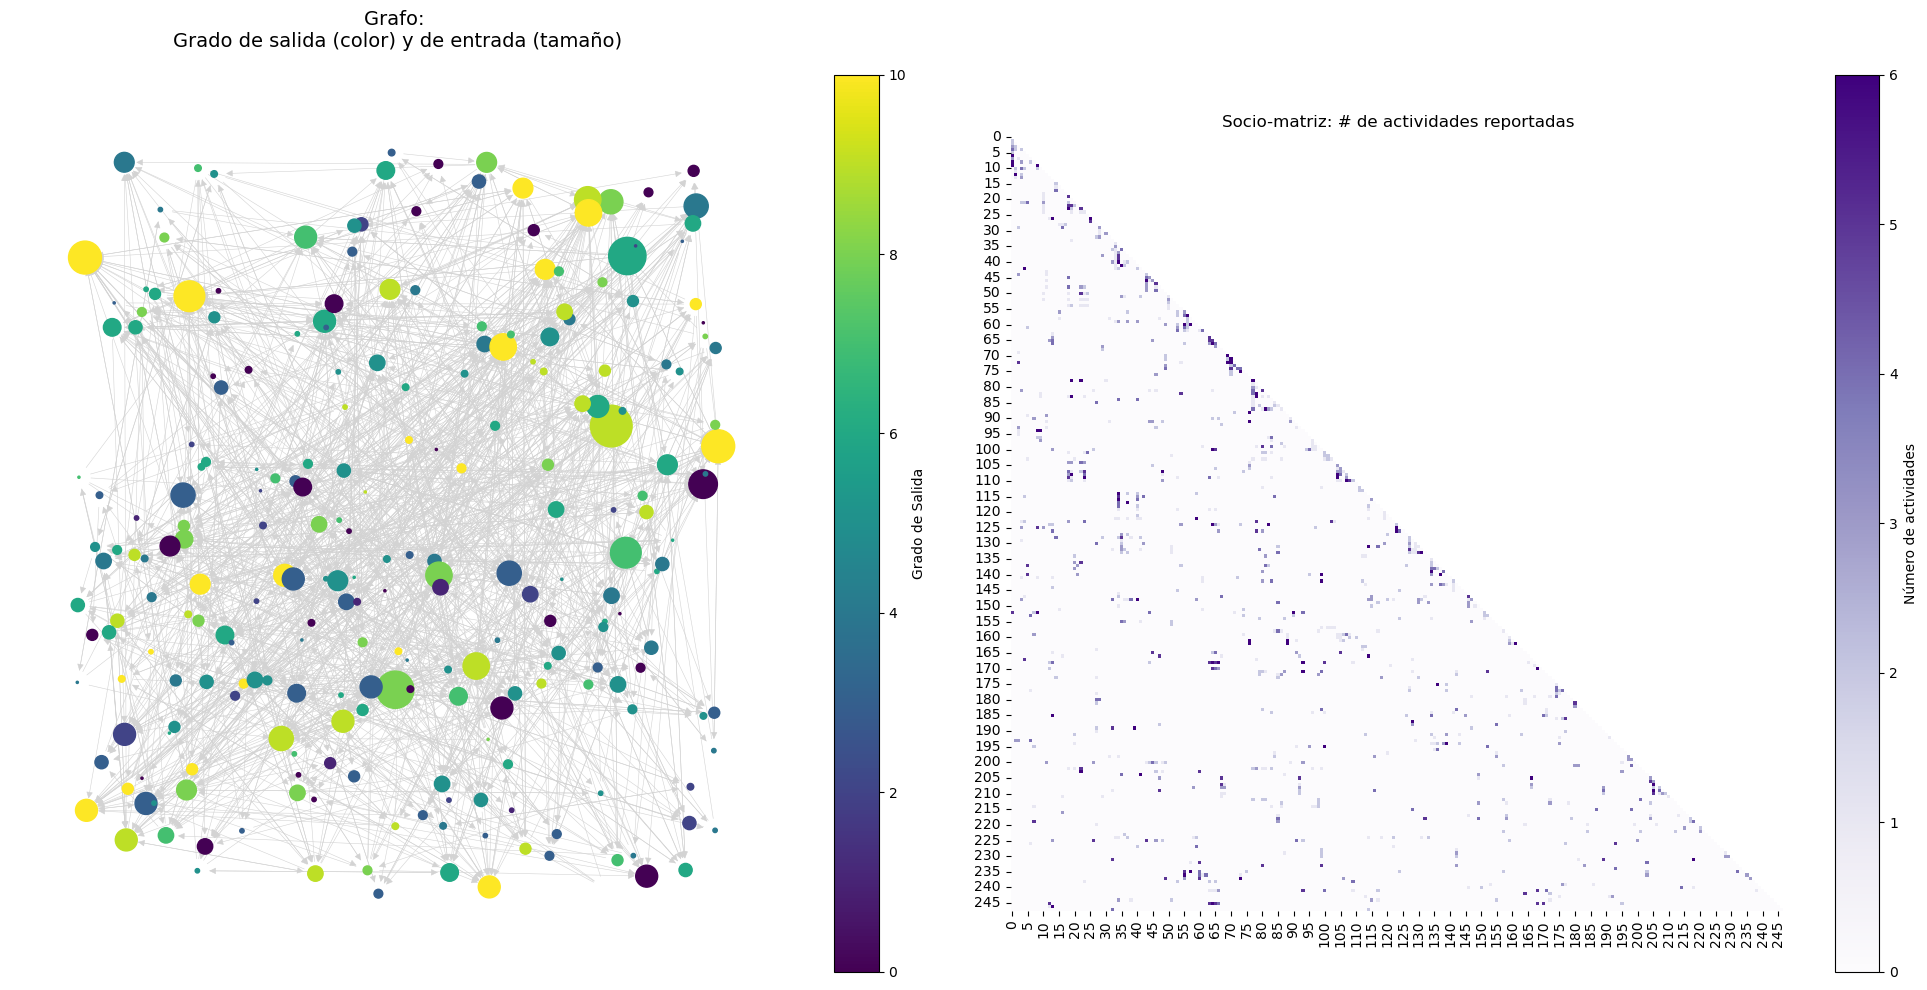

In [65]:
# (d) Visualizar la red sin tener en cuenta las variables nodales por medio de un grafo y una socio-matriz.

## Establecer la semilla
np.random.seed(21022024)

plt.figure(figsize = (20, 10))  ## Ajusta el tamaño total de la figura

## Dibujar el grafo
plt.subplot(1, 2, 1)
pos = nx.random_layout(D3)
## Parámetros de tamaño y color
node_sizes = [2.5 * (D3.in_degree(v) ** 2) for v in D3]
node_colors = [D3.out_degree(v) for v in D3]
## Dibujar los nodos
nodes = nx.draw_networkx_nodes(D3, pos=pos, node_size=node_sizes, node_color=node_colors)
edges = nx.draw_networkx_edges(D3, pos=pos, edge_color='lightgrey', width=0.4)
## Agregar la barra de colores
cbar = plt.colorbar(nodes)
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Grado de Salida', fontsize=10)
## Título
plt.title('Grafo: \nGrado de salida (color) y de entrada (tamaño)', fontsize=14, loc='center', pad=20)
plt.axis('off')


## Obtener la matriz de adyacencia
A = nx.adjacency_matrix(D3, weight="activities").todense()
## Máximo de actividades reportadas por díada
A = np.maximum(A, A.T)
## Mascara la matriz triangular superior
A = A.astype(float)
A[np.triu_indices_from(A)] = np.nan

# Heatmap
plt.subplot(1, 2, 2)
heatmap = sns.heatmap(A, annot=False, cbar=False, cmap=plt.cm.Purples, vmin=0, square=True)
## Obtener el objeto mappable
mappable = heatmap.get_children()[0]
cbar = plt.colorbar(mappable)
cbar.ax.tick_params(labelsize=10)
## Ajustar la etiqueta de la barra de color
cbar.set_label("Número de actividades", fontsize=10)
plt.title('Socio-matriz: # de actividades reportadas')

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

In [66]:
# (e) Identificar el top 5 de los nodos más propensos a emitir/recibir relaciones.

## Calcular el grado de entrada y de salida de cada nodo
grado_entrada = dict(D3.in_degree())
grado_salida = dict(D3.out_degree())

## Identificar los top 5 nodos más propensos a recibir relaciones (mayor grado de entrada)
top_5_recibir = sorted(grado_entrada, key = grado_entrada.get, reverse = True)[:5]
## Identificar los top 5 nodos más propensos a emitir relaciones (mayor grado de salida)
top_5_emitir = sorted(grado_salida, key = grado_salida.get, reverse = True)[:5]

print("Top 5 nodos más propensos a recibir relaciones:")
for nodo in top_5_recibir:
    print(f"Nodo: {nodo}, Grado de entrada: {grado_entrada[nodo]}.")

print("\nTop 5 nodos más propensos a emitir relaciones:")
for nodo in top_5_emitir:
    print(f"Nodo: {nodo}, Grado de salida: {grado_salida[nodo]}.")

Top 5 nodos más propensos a recibir relaciones:
Nodo: 29, Grado de entrada: 19.
Nodo: 44, Grado de entrada: 17.
Nodo: 181, Grado de entrada: 17.
Nodo: 150, Grado de entrada: 15.
Nodo: 129, Grado de entrada: 15.

Top 5 nodos más propensos a emitir relaciones:
Nodo: 86, Grado de salida: 10.
Nodo: 150, Grado de salida: 10.
Nodo: 8, Grado de salida: 10.
Nodo: 215, Grado de salida: 10.
Nodo: 12, Grado de salida: 10.


##### Visualizaciones individuales del ejercicio 9

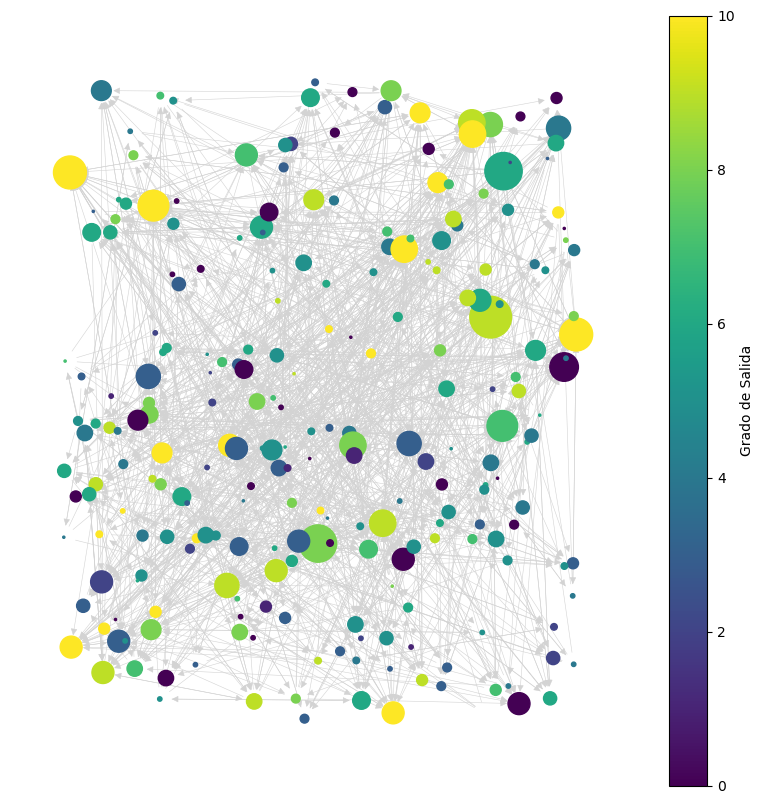

In [67]:
# 1. Grafo

## Establecer la semilla
np.random.seed(21022024)

## Dibujar el grafo
plt.figure(figsize = (10, 10))
pos = nx.random_layout(D3)
node_sizes = [2.5 * (D3.in_degree(v) ** 2) for v in D3]
node_colors = [D3.out_degree(v) for v in D3]

## Dibujar los nodos
nodes = nx.draw_networkx_nodes(D3, pos = pos, node_size = node_sizes, node_color = node_colors)
edges = nx.draw_networkx_edges(D3, pos = pos, edge_color = 'lightgrey', width = 0.4)

## Agregar la barra de colores
cbar = plt.colorbar(nodes)
cbar.ax.tick_params(labelsize = 10)  ## Ajustar tamaño de los números en la barra
cbar.set_label('Grado de Salida', fontsize = 10)  ## Ajustar tamaño de la etiqueta de la barra

#plt.title('Grafo: \nGrado de salida (color) y de entrada (tamaño)', fontsize = 14, loc = 'center', pad = 20)
plt.axis('off')
plt.show()

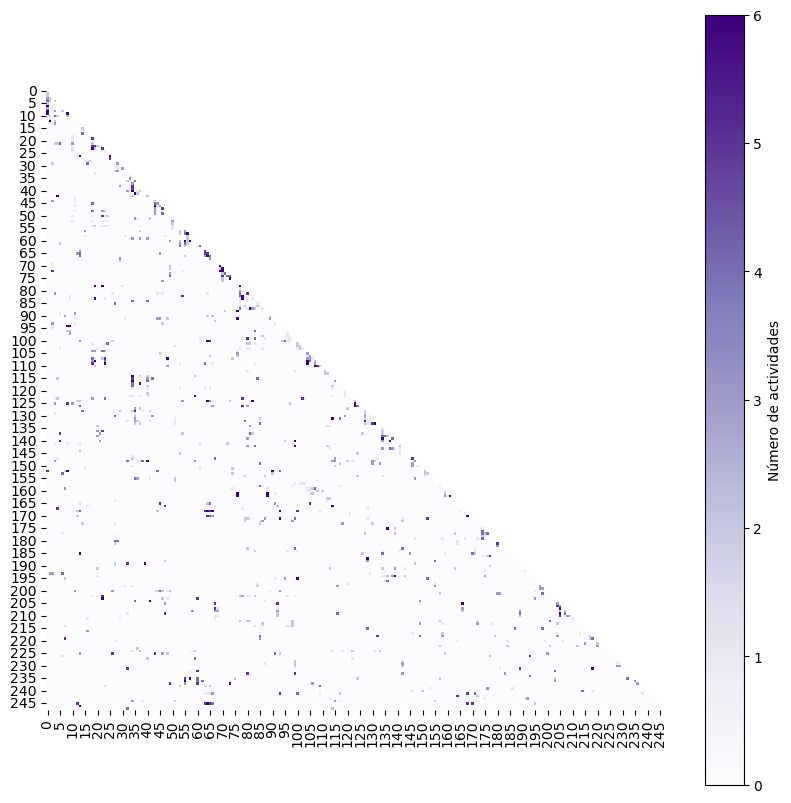

In [68]:
# 2. Socio-Matriz

## Establecer la semilla
np.random.seed(21022024)

## Obtener la matriz de adyacencia
A = nx.adjacency_matrix(D3, weight = "activities").todense()
## Máximo de actividades reportadas por díada
A = np.maximum(A, A.T)
## Mascara la matriz triangular superior
A = A.astype(float)
A[np.triu_indices_from(A)] = np.nan

# heatmap
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(A, annot=False, 
                      cbar=False, cmap=plt.cm.Purples,
                      vmin=0, square=True)
## Obtener el objeto mappable
mappable = heatmap.get_children()[0]
## Ajustar la etiqueta de la barra de color
cbar = plt.colorbar(mappable)
cbar.ax.tick_params(labelsize = 10)
cbar.set_label("Número de actividades", fontsize=10)

#plt.title('Socio-matriz: # de actividades reportadas')

### Ejercicio 10
Sintetizar y replicar la sección 2.4.2 (Special Types of Graphs, p. 24) de Kolaczyk and Csárdi (2020).

Se ilustra la noción de "todas las formas y tamaños" con los ejemplos de 4 familias de gráficos que se muestran a continuación.

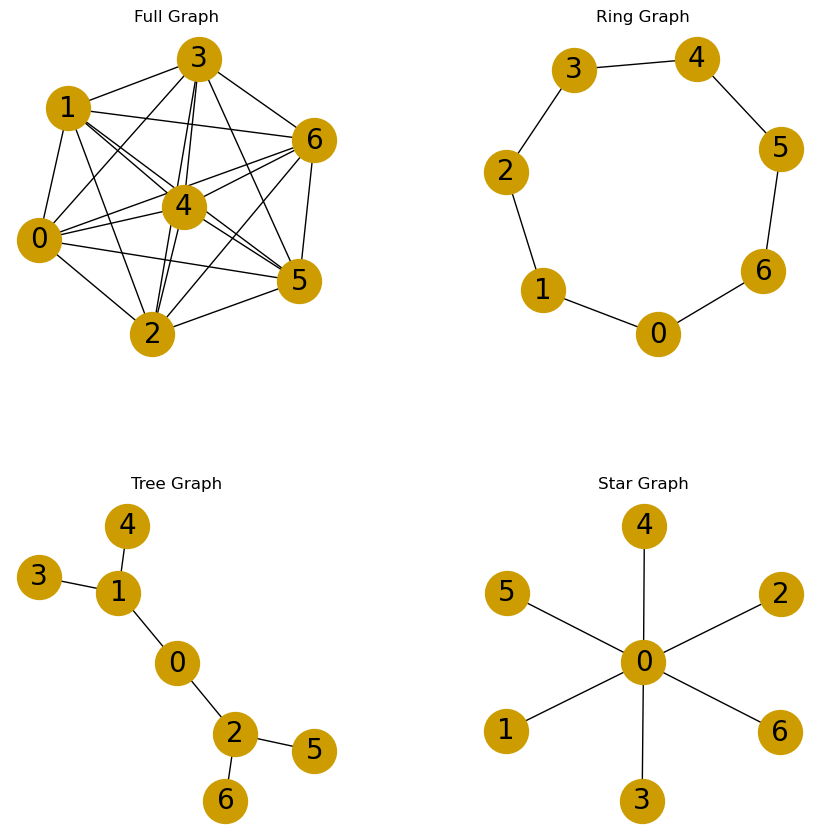

In [69]:
# Pág 25 del libro

## Establecer la semilla
np.random.seed(25022024)

## Crear grafos
g_full = nx.complete_graph(7)
g_ring = nx.cycle_graph(7)
g_tree = nx.full_rary_tree(2, 7)
g_star = nx.star_graph(6)

## Configurar el diseño de la figura
plt.figure(figsize = (10, 10))
plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1, wspace = 0.4, hspace = 0.4)

## Dibujar grafos
plt.subplot(2, 2, 1)
nx.draw(g_full, with_labels = True, node_color = '#cc9c00', node_size = 1000, font_size = 20)
plt.title('Full Graph')

plt.subplot(2, 2, 2)
nx.draw(g_ring, with_labels = True, node_color = '#cc9c00', node_size = 1000, font_size = 20)
plt.title('Ring Graph')

plt.subplot(2, 2, 3)
nx.draw(g_tree, with_labels = True, node_color = '#cc9c00', node_size = 1000, font_size = 20)
plt.title('Tree Graph')

plt.subplot(2, 2, 4)
nx.draw(g_star, with_labels = True, node_color = '#cc9c00', node_size = 1000, font_size = 20)
plt.title('Star Graph')

plt.show()

Un **Directed Acyclic Graph o Grafo Acíclico Dirigido (DAG)**, como su nombre lo indica, es un gráfico dirigido que no tiene ciclos dirigidos.

In [70]:
# Pág 26 del libro

## Digrafo sacado del libro pág 16
dg = nx.DiGraph()
dg.add_edges_from([("Sam", "Mary"), ("Sam", "Tom"), ("Mary", "Tom"), ("Tom", "Mary")])

## Verificar si es un DAG
nx.is_directed_acyclic_graph(dg)

False

Un **gráfico bipartito** es un gráfico $G = (V, E)$ tal que el conjunto de vértices $V$ puede dividirse en dos conjuntos disjuntos, digamos $V_1$ y $V_2$, y cada arista en $E$ tiene un punto final en $V_1$ y el otro en $V_2$ (Kolaczyk & Csárdi, 2014, p. 26).

In [71]:
# Pág 27 del libro

## Crear el grafo bipartito
g_bip = nx.Graph()
g_bip.add_nodes_from(['actor1', 'actor2', 'actor3'], bipartite = 0)  # Actores
g_bip.add_nodes_from(['movie1', 'movie2'], bipartite = 1)  # Películas
g_bip.add_edges_from([('actor1', 'movie1'), ('actor2', 'movie1'), ('actor2', 'movie2'), ('actor3', 'movie2')])

## Agregar atributo 'type' a los nodos según su nombre
for node in g_bip.nodes():
    g_bip.nodes[node]['type'] = node.startswith('movie')

# Imprimir información del grafo
print("Nodes: ")
print("name", "type")
for node, data in g_bip.nodes(data = "type"):
    print(node, data)

print("\nEdges: ")
for edge in g_bip.edges():
    print(edge)

Nodes: 
name type
actor1 False
actor2 False
actor3 False
movie1 True
movie2 True

Edges: 
('actor1', 'movie1')
('actor2', 'movie1')
('actor2', 'movie2')
('actor3', 'movie2')


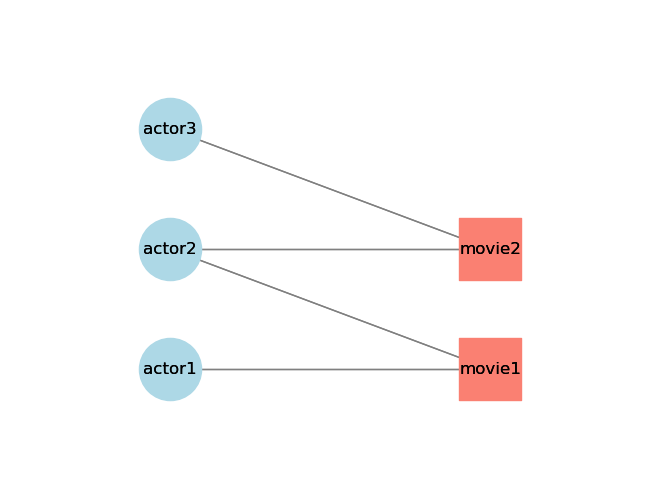

In [72]:
# Visualización (no hace parte del código replicado del capítulo)

## Establecer la semilla
np.random.seed(25022024)

## Obtener las listas de nodos bipartitos
actors = [n for n, d in g_bip.nodes(data = True) if d['bipartite'] == 0]
movies = [n for n, d in g_bip.nodes(data = True) if d['bipartite'] == 1]

## Crear la posición para los nodos bipartitos
pos = dict()
pos.update((node, (1, index)) for index, node in enumerate(actors))  # Actores
pos.update((node, (2, index)) for index, node in enumerate(movies))  # Películas

## Dibujar el grafo
nx.draw(g_bip, pos, node_shape = 's', nodelist = movies,
        node_color = 'salmon', node_size = 2000, with_labels = True, edge_color = "grey")
nx.draw(g_bip, pos, node_shape = 'o', nodelist = actors,
        node_color = 'lightblue', node_size = 2000, with_labels = True, edge_color = "grey")

## Ajustar los límites del gráfico
plt.xlim(0.5, 2.5)
plt.ylim(-1, len(actors))

## Mostrar el gráfico
plt.show()

Se denomina **proyección** sobre un subconjunto de vértices a un grafo $G_1 = (V_1, E_1)$ definido en el conjunto de vértices $V_1$ asignando una arista a cualquier par de vértices que tengan ambos aristas en $E$ hacia al menos un vértice común en $V_2$ (Kolaczyk & Csárdi, 2014, p. 27).

In [73]:
## Proyección de la red bipartita
actor_proj = nx.bipartite.projected_graph(g_bip, ['actor1', 'actor2', 'actor3'])
movie_proj = nx.bipartite.projected_graph(g_bip, ['movie1', 'movie2'])

## Imprimir información de la proyección de actores
print("Proyección de Actores:")
print(actor_proj.edges)

## Imprimir información de la proyección de películas
print("\nProyección de Películas:")
print(movie_proj.edges)

Proyección de Actores:
[('actor1', 'actor2'), ('actor2', 'actor3')]

Proyección de Películas:
[('movie1', 'movie2')]


## Referencias

Kolaczyk, E. D., & Csárdi, G. (2020). *Statistical analysis of network data with R (Ed. 2)*. New York: Springer.